In [2]:
#KNN
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
wine=datasets.load_wine()
print(wine.data.shape)
df=pd.DataFrame(data =wine.data, columns =wine.feature_names)
df.head()


(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
#without preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)


In [6]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7407407407407407


In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(wine.data)
temp=scaler.fit_transform(wine.data)
print(temp[:5])

[[0.84210526 0.1916996  0.57219251 0.25773196 0.61956522 0.62758621
  0.57383966 0.28301887 0.59305994 0.37201365 0.45528455 0.97069597
  0.56134094]
 [0.57105263 0.2055336  0.4171123  0.03092784 0.32608696 0.57586207
  0.51054852 0.24528302 0.27444795 0.26450512 0.46341463 0.78021978
  0.55064194]
 [0.56052632 0.3201581  0.70053476 0.41237113 0.33695652 0.62758621
  0.61181435 0.32075472 0.75709779 0.37542662 0.44715447 0.6959707
  0.64693295]
 [0.87894737 0.23913043 0.60962567 0.31958763 0.4673913  0.98965517
  0.66455696 0.20754717 0.55835962 0.55631399 0.30894309 0.7985348
  0.85734665]
 [0.58157895 0.36561265 0.80748663 0.53608247 0.52173913 0.62758621
  0.49578059 0.49056604 0.44479495 0.25938567 0.45528455 0.60805861
  0.32596291]]


[0 0 2 1 2 2 2 1 1 2 2 0 0 1 0 2 2 2 2 2 1 0 1 1 1 1 0 2 0 1 0 0 1 2 0 2 0
 2 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0]
[0 0 2 1 2 2 2 1 1 2 2 0 0 1 0 2 2 2 2 2 1 0 1 1 1 1 0 2 0 1 0 0 1 2 0 2 0
 2 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0]
Accuracy: 0.9629629629629629


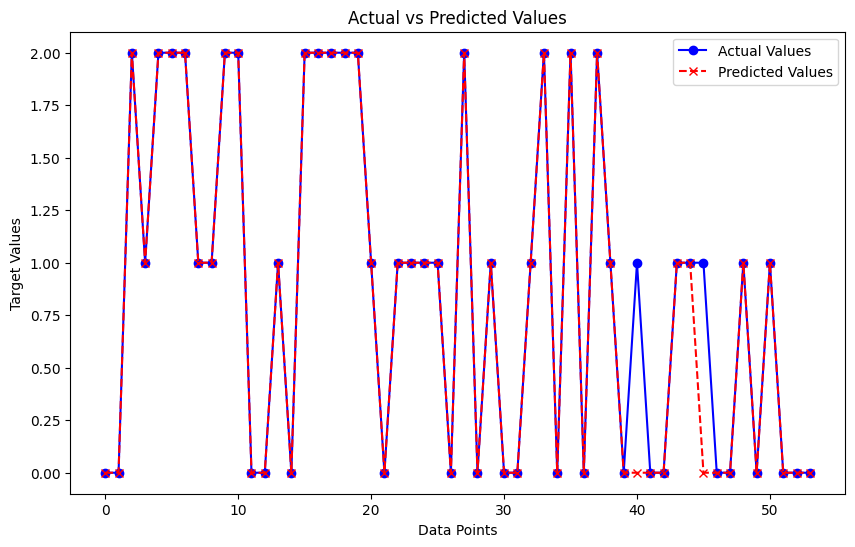

In [8]:
X_train,X_test,y_train,y_test=train_test_split(temp,wine.target, test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred2=knn.predict(X_test)
print(y_pred2)
print(y_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))


# Plotting actual vs predicted values
plt.figure(figsize=(10,6))

# Plot the actual values
plt.plot(y_test, label='Actual Values', color='blue', marker='o')

# Plot the predicted values
plt.plot(y_pred2, label='Predicted Values', color='red', linestyle='--', marker='x')

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Target Values')

# Show legend
plt.legend()
plt.savefig("fig.png",dpi=2000)
# Show plot
plt.show()

